<a href="https://colab.research.google.com/github/MinhVuong2000/Data-Science/blob/master/Titanic_SurvivedPeople.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem
This is practice for machine learning to input, explore and predict [the data](https://www.kaggle.com/c/titanic)



## Import data

In [1]:
# !pip install --upgrade --force-reinstall --no-deps kaggle
# !import file from kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

!ls

Saving kaggle.json to kaggle (1).json
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
 gender_submission.csv	 kaggle.json   test.csv			 train.csv
'kaggle (1).json'	 sample_data   titanic_predictions.csv


In [2]:
# import zipfile
# zip_ref = zipfile.ZipFile('titanic.zip', 'r')
# zip_ref.extractall('files')
# zip_ref.close()
# !ls files

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
train_df = pd.read_csv('train.csv')#('files/train.csv')
test_df = pd.read_csv('test.csv')#('files/test.csv')
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


## Clean data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jensen, Mr. Svend Lauritz",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### Drop unnecessary columns

In [8]:
train_df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [9]:
test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

### Handle missing value

#### Train Data

In [10]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
#handle missing value in column Age by Median ( because type of column Age is float )
train_df.Age.fillna(train_df.Age.median(), inplace=True)

In [12]:
#handle missing value in column Embarked by Mode( because type of column Embarked is category )
train_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace=True)

In [13]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Test Data

In [14]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [15]:
#handle missing value in column Age by Median ( because type of column Age is float )
test_df.Age.fillna(train_df.Age.median(), inplace=True)

In [16]:
#handle missing value in column Fare by median( because type of column Fare is float )
test_df.Fare.fillna(train_df.Fare.median(), inplace=True)

In [17]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Get Information from Data

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
train_df.corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [20]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

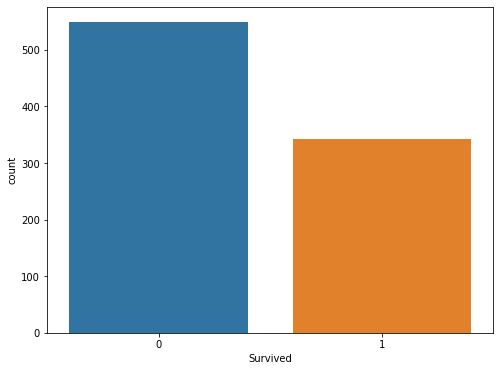

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data= train_df)

**Can see that, the number of survived is less than died**

In [22]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

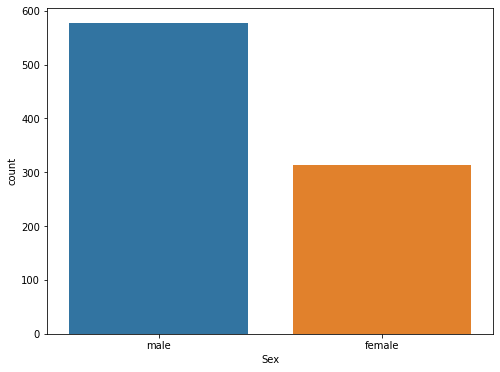

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=train_df)

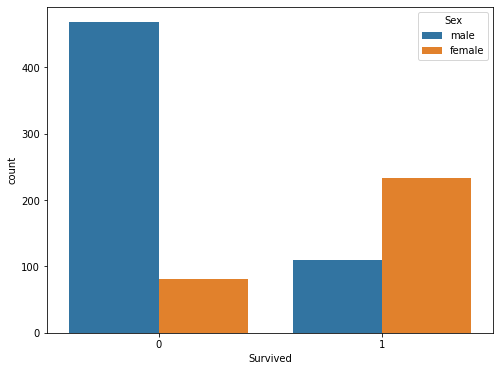

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train_df, hue='Sex')

From chart,althought the number of male sex is higher than female sex, they tends to easier to died than. Even, the number of servived female is ratio than two

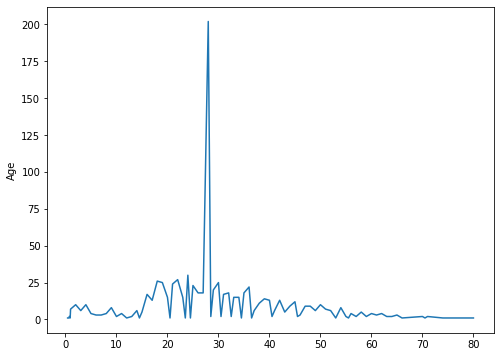

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(data=train_df['Age'].value_counts())

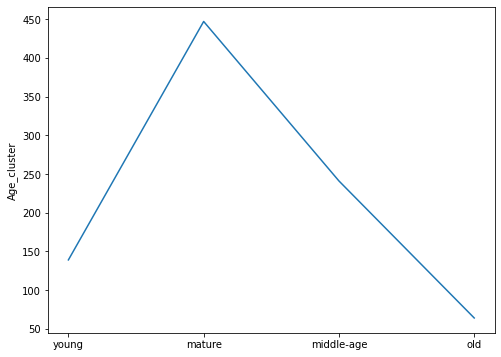

In [26]:
age_cluster = [[0,18,30,50,90],['young','mature','middle-age','old']]
train_df['Age_cluster'] = pd.cut(train_df['Age'], bins=age_cluster[0], labels=age_cluster[1])
plt.figure(figsize=(8,6))
sns.lineplot(data=train_df['Age_cluster'].value_counts())

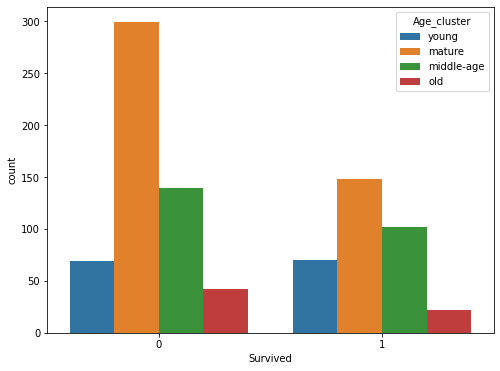

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train_df, hue='Age_cluster')

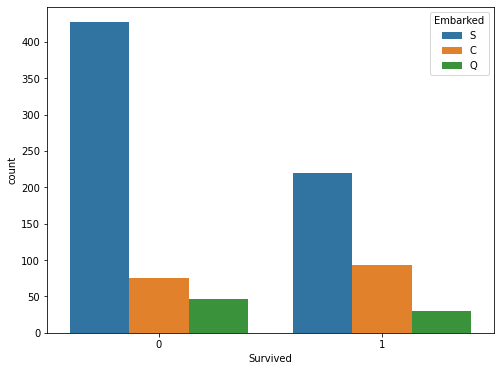

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train_df, hue='Embarked')

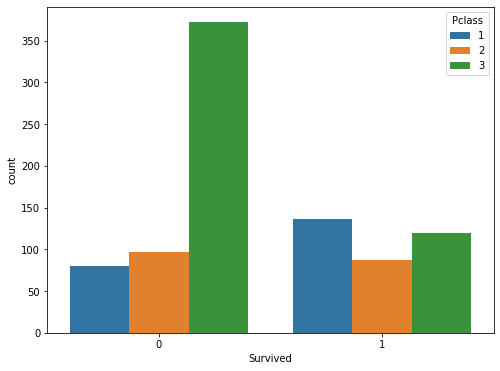

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train_df, hue='Pclass')

In [30]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

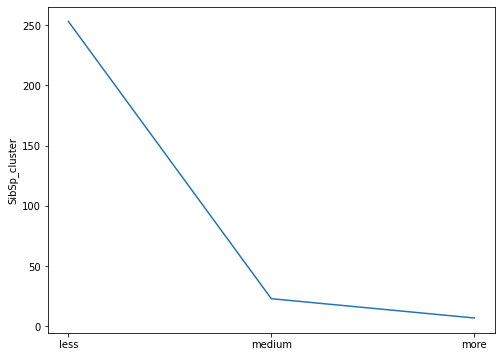

In [31]:
age_cluster = [[0,3,6,9],['less','medium','more']]
train_df['SibSp_cluster'] = pd.cut(train_df['SibSp'], bins=age_cluster[0], labels=age_cluster[1])
plt.figure(figsize=(8,6))
sns.lineplot(data=train_df['SibSp_cluster'].value_counts())

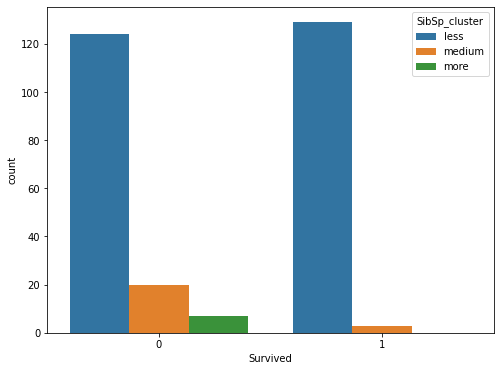

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train_df, hue='SibSp_cluster')

### Visualization  data

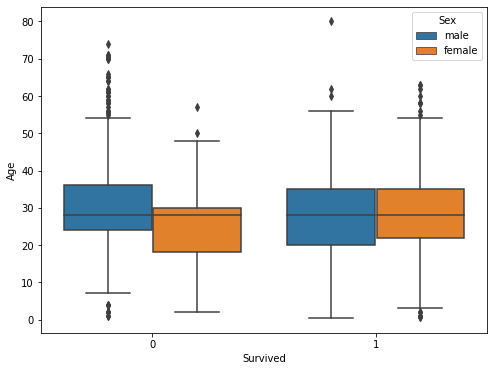

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data= train_df)

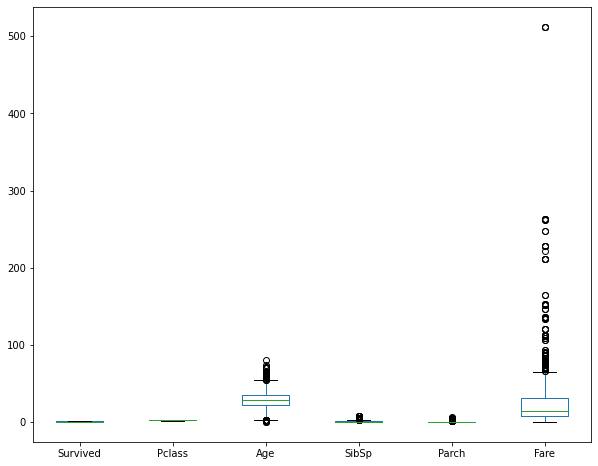

In [34]:
train_df.plot(kind='box', figsize= (10,8))

Column Parch has more 75% less than 0, so we drop this column

In [35]:
train_df.drop(columns=['Parch'], inplace=True)

#### **Detect and Drop outlier**
to find outlier, i can use:
- Using Box plots
- Using Scatter plot
- Using Z-score

to drop , can use:
- Interquartile Range(IQR) Method (using below)
- Z Score method
  + from scipy import stats  
z=np.abs(stats.zscore(df.hp))  
threshold=3  
print(np.where(z>3))  
df1=df[(z< 3)]  
print(df1)

In [36]:
numerical_columns = ['Age','SibSp','Fare']

Q1 = train_df[numerical_columns].quantile(0.25)
Q3 = train_df[numerical_columns].quantile(0.75)
IQR = Q3-Q1

#clip will change outlier into 2 bounder
train_df[numerical_columns]= train_df[numerical_columns].clip(lower= Q1-1.5*IQR, upper= Q3+1.5*IQR, axis=1)
#train_df[columns_train]= train_df[columns_train].clip(lower= train_df[columns_train].quantile(0.15), upper= train_df[columns_train].quantile(0.85), axis=1)

# # we can drop outlier 
# from scipy import stats
# for col in columns_train:
#   train_df[col]=stats.zscore(train_df[col])
#   train_df.loc[df['z_score'].abs()<=3]

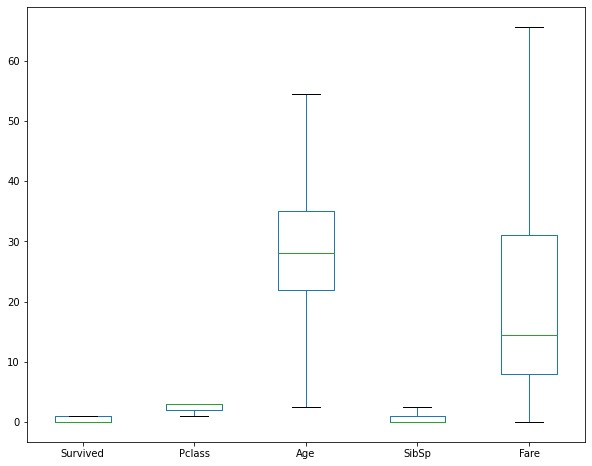

In [37]:
train_df.plot(kind='box', figsize= (10,8))

#### Test Data

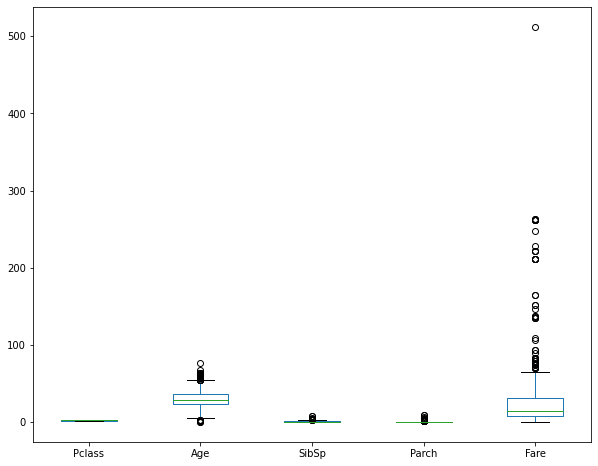

In [38]:
test_df.plot(kind='box', figsize= (10,8))

In [39]:
test_df.drop(columns=['Parch'], inplace=True)

In [40]:
numerical_columns = ['Age','SibSp','Fare']

#clip will change outlier into 2 bounder
test_df[numerical_columns]= test_df[numerical_columns].clip(lower= test_df[numerical_columns].quantile(0.15), upper= test_df[numerical_columns].quantile(0.85), axis=1)


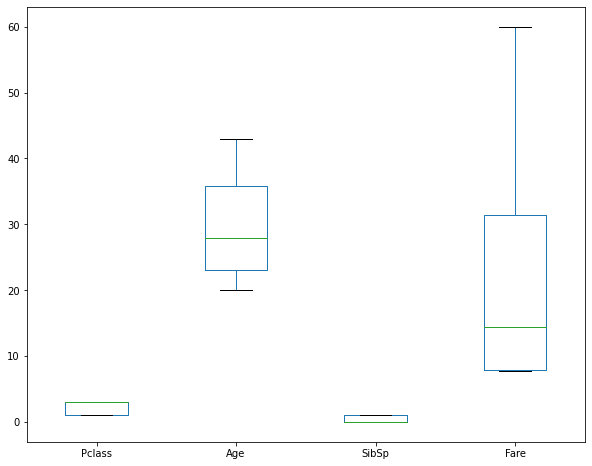

In [41]:
test_df.plot(kind='box', figsize= (10,8))

### Encoding
check value_counts to display values it has, from that identify type of data ( numeric, ordinal...) to encode

In [42]:
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex','Embarked'], drop_first=True)
train_df.drop(columns=['SibSp_cluster','Age_cluster'], inplace=True)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Fare        891 non-null    float64
 4   Pclass_2    891 non-null    uint8  
 5   Pclass_3    891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 32.3 KB


In [44]:
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Sex','Embarked'], drop_first=True)

In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Fare        418 non-null    float64
 3   Pclass_2    418 non-null    uint8  
 4   Pclass_3    418 non-null    uint8  
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 12.0 KB


## Split data to get Label

In [46]:
X_train= train_df.iloc[:, 1:]
y_train= train_df['Survived'].values.reshape(-1,1)

X_test= test_df

### Normalize data

In [47]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

features= ['Age', 'SibSp', 'Fare']

X_train[features]= ss.fit_transform(X_train[features])
X_test[features]= ss.fit_transform(X_test[features])

### Split train data into train+validate

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
print('Number of rows train data:',X_train.shape[0])
print('Number of rows validation data:',X_val.shape[0])
print('Number of rows test data:',X_test.shape[0])


Number of rows train data: 712
Number of rows validation data: 179
Number of rows test data: 418


## Create Model to Predict

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(verbose=1)
clf.fit(X_train, y_train)
predictions= clf.predict(X_test)
print('Score model on train dataset: ',clf.score(X_train, y_train))
print('Score model on validation dataset: ',clf.score(X_val, y_val))

Score model on train dataset:  0.8089887640449438
Score model on validation dataset:  0.7932960893854749


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


**Score of Logistic Model is 0.8**

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rdfr_clf = RandomForestClassifier(random_state=0, verbose=1)#max_depth=2, n_estimators=...
rdfr_clf.fit(X_train, y_train)
predictions= rdfr_clf.predict(X_test)
print('Score model on train dataset: ',rdfr_clf.score(X_train, y_train))
print('Score model on validation dataset: ',rdfr_clf.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Score model on train dataset:  0.9719101123595506
Score model on validation dataset:  0.8212290502793296


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


**Score of RandomForest Model on Trainning dataset is 0.97, but only 0.82 on Validation Dataset**--> easy to overfitting

### Tuning Random Forest

In [69]:
n_estimators = [10,20,50,100,200,500]
max_depth = [2,3,5,10,20]
scores_train = pd.DataFrame(index=max_depth, columns=n_estimators)
scores_val = pd.DataFrame(index=max_depth, columns=n_estimators)
for i in n_estimators:
  for j in max_depth:
    rdfr_clf = RandomForestClassifier(n_estimators=i,max_depth=j, random_state=0)
    rdfr_clf.fit(X_train, y_train)
    scores_train.loc[j,i] = rdfr_clf.score(X_train, y_train)
    scores_val.loc[j,i] = rdfr_clf.score(X_val, y_val)
    # print('Score model with n_estimations={}, max_depth={} on train dataset : {}'.format(i,j,rdfr_clf.score(X_train, y_train)))
    # print('Score model with n_estimations={}, max_depth={} on val dataset : {}'.format(i,j,rdfr_clf.score(X_val, y_val)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

In [70]:
scores_train.head()

,10,20,50,100,200,500
2,0.786517,0.813202,0.811798,0.811798,0.81882,0.811798
3,0.828652,0.839888,0.832865,0.821629,0.832865,0.830056
5,0.853933,0.849719,0.84691,0.849719,0.853933,0.848315
10,0.935393,0.941011,0.941011,0.939607,0.942416,0.941011
20,0.962079,0.966292,0.97191,0.97191,0.97191,0.97191


<Figure size 1080x720 with 0 Axes>

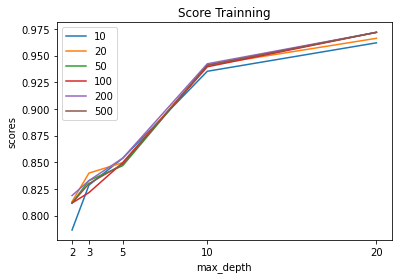

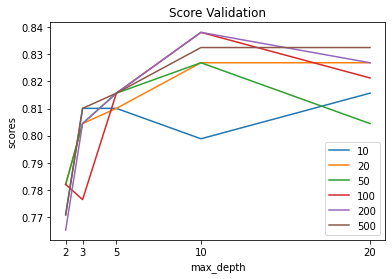

In [71]:
plt.figure(figsize=(15,10))
scores_train.plot(kind='line', xlabel='max_depth', ylabel='scores', xticks=max_depth, title='Score Trainning')
scores_val.plot(kind='line', xlabel='max_depth', ylabel='scores', xticks=max_depth, title='Score Validation')

**From 2 charts, can see that best model for random forest is max_depth = 10, and number of tree is 200**

## Submission

In [51]:
submission= pd.DataFrame({'PassengerId' : pd.read_csv('test.csv')['PassengerId'], 'Survived': predictions })
print(submission.head())
filename= 'titanic_predictions.csv'
submission.to_csv(filename, index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
